<a href="https://colab.research.google.com/github/daphnecor/Computational_neuroscience/blob/main/ACNS_Week1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Computational Neuroscience
```
Student: Daphne Cornelisse (s1066862)
``` 


# Weekly exercises 

## DA Chapter 1: Ex. 1 

>  Generate spikes for 10 s (or longer if you want better statistics) using
a Poisson spike generator with a constant rate of 100 Hz, and record
their times of occurrence. Compute the coefficient of variation of the
interspike intervals, and the Fano factor for spike counts obtained
over counting intervals ranging from 1 to 100 ms. Plot the interspike
interval histogram.

In [1]:
'''
Dependencies
'''
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')
from scipy.stats import kde
sns.set_style('white')
# to change default color cycle
color_scheme = ['#616F85', '#C2BAA3', '#F5E6CE', '#DD9D7C', '#C9445F']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_scheme)
np.random.seed(0) # reproducability

In [2]:
'''
Parameterise
'''
T = 10 # s
dt = 0.001 # ms
lam = 100 # firing rate (Hz) 
N = int(T/dt)  # steps

In [3]:
'''
Generate 10 spike trains
'''
y = np.zeros((T, N))

for i in range(T):
  for j in range(N):
    if np.random.uniform(0,1) < lam*dt: y[i,j] = 1 

An interspike interval (ISI) is the time in-between subsequent spikes. Computing the differences between spikes for a spike-train yields a distribution. 

<!-- ![](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/w/images/3/38/Spiketimes.png) -->

<img src="https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/w/images/3/38/Spiketimes.png" alt="drawing" width="400"/>

In [4]:
isi = []
for tr in range(T):
  y_tr = y[tr, :] # take spike train of one trial
  spike_times = np.where(y_tr==1) # find indices where neuron spikes
  isi.append(list(np.diff(spike_times)[0])) # store interspike-intervals 

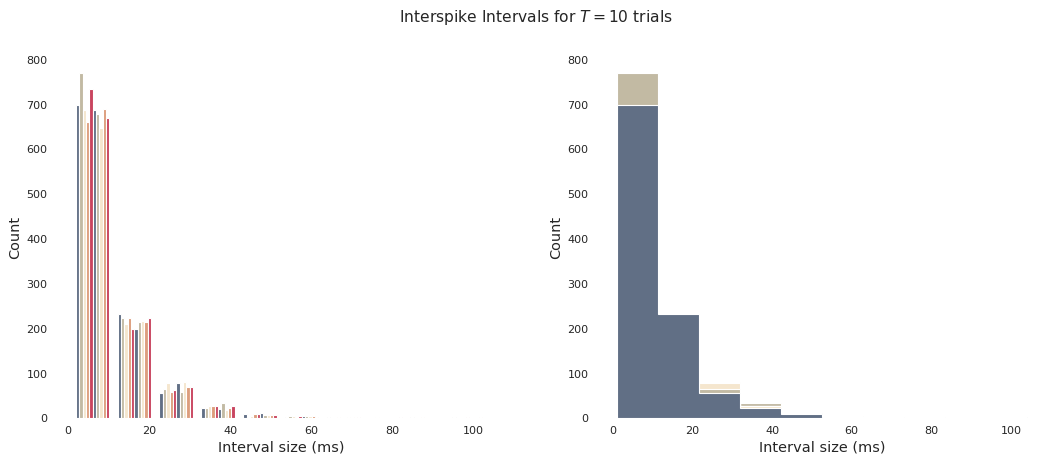

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6), dpi=80)
fig.suptitle(r'Interspike Intervals for $T=10$ trials', fontsize=14)
ax1.hist(isi)
ax1.set_xlabel('Interval size (ms)', fontsize=13)
ax1.set_ylabel('Count', fontsize=13);

ax2.hist(isi, histtype='stepfilled')
ax2.set_xlabel('Interval size (ms)', fontsize=13)
ax2.set_ylabel('Count', fontsize=13)
sns.despine(left=True, bottom=True);

The Coefficient of variation is the ratio of the standard deviation to the mean 
\begin{align}
  C_V = \frac{\sigma_{\tau}}{\langle \tau \rangle}
\end{align}

In [6]:
'''
Coefficient of variation
'''
Cv_arr = []
for tr in range(T): # iterate through trials
  isi_tr = y[:, tr] 
  Cv_arr.append(np.mean(isi_tr) / np.std(isi_tr))

Cv_arr

[0.3333333333333333,
 1.0,
 nan,
 0.49999999999999994,
 0.3333333333333333,
 0.3333333333333333,
 nan,
 nan,
 0.3333333333333333,
 0.3333333333333333]

The Fano Factor is another measure to quantify the amount of variability in a spike train. It is defined as 
\begin{align}
 F = \frac{\sigma^2}{\langle n \rangle}
\end{align}
where $\sigma^2$ is the variance and $\langle n \rangle$ the expected value


## Handouts Chapter 2

### Ex. 1

---

> Show that the Gamma distribution for large $N$ becomes the Gaussian distribution.

---

Let $X$ be a random variable sampled from a Gamma distribution. The probability density of a Gamma distribution is
\begin{align}
  f(x) = \frac{1}{\Gamma(n) \beta^n} x^{n - 1} e^{-x/\beta} \qquad \text{ for } x > 0, \, n, \beta > 0
\end{align}
with
\begin{align}
  \mathbb{E}[X] = n \beta \, \text{ and } \, \text{Var}[X] = n\beta^2
\end{align}
and the Gamma function is defined as
\begin{align}
  \Gamma(n) = \int_0^\infty x^{\alpha - 1} e^{-x} dx
\end{align}
The Gamma distribution is directly related to the students t distribution
\begin{align}
  f(x) = \frac{\Gamma (\frac{n+1}{2})}{\sqrt{\pi n} \Gamma(\frac{n}{2})} \left( 1 + \frac{x^2}{n} \right)^{-\frac{n+1}{2}}
\end{align}
where $n$ denotes the degrees of freedom.

By the Central Limit Theorem it follows that for large N - as $N \rightarrow \infty$ - the t-distribution converges to the Normal distribution with $\mathcal{N}(0,1)$. Thus, the Gamma distribution converges to the Normal distribution. 


### Ex. 2

---

> Verify that the Laplace transformation of $f(t)=\frac{1}{\sqrt \pi t}$ is $\hat{f}(s) = \frac{1}{\sqrt s}$

---

If $f(t)$ is a function of $t$, then the Laplace transform of $f$, denoted by $\hat{f}$ is given by
\begin{align}
& \hat{f}(s) = \int_{0}^{\infty} f(t) \exp(-st) dt
\end{align}
We subsitute $f(t) =  \frac{1}{\sqrt{\pi t}}$ in the definition above and simplify

\begin{align}
\hat{f}(s) &= \int_{0}^{\infty} \exp(-st) \frac{1}{\sqrt{\pi t}} dt \\
&= \frac{1}{\sqrt{\pi}} \int_{t=0}^{t=\infty} \exp(-st) \frac{1}{\sqrt{t}} dt  \\
\end{align}

We do a u-sub
$$
u = st \quad du = s \: dt \rightarrow dt = \frac{1}{s} du
$$ 
and integrate

\begin{align}
\hat{f}(s) &= \frac{1}{\sqrt{\pi}} \int\limits_{u=0}^{u=\infty} \exp(-u) \frac{\sqrt{s}}{\sqrt{ u}} \frac{1}{s} du \\
\hat{f}(s) &=  \frac{\sqrt{s}}{\sqrt{\pi} s} \int_{u=0}^{u=\infty} \exp(-u) \frac{1}{\sqrt{ u}}  du 
\end{align}

Another one
$$
w = \sqrt{u} \quad dw = \frac{1}{2 \sqrt{u}} du \rightarrow du = 2 \sqrt{u} dw 
$$ 

\begin{align}
\hat{f}(s) &=  \frac{\sqrt{s}}{\sqrt{\pi}s} \int_{0}^{\infty} \exp(-w^2) \frac{1}{\sqrt{ u}} 2 \sqrt{u} dw \\
\hat{f}(s) &=  \frac{2 \sqrt{s}}{\sqrt{\pi} s} \int_{0}^{\infty} \exp(-w^2)  dw 
\end{align}

Recognising the gaussian integral, integration yields

\begin{align}
\hat{f}(s) &= \frac{2 \sqrt{s} }{\sqrt{\pi} s} \frac{1}{2} \sqrt{\pi} \\
&= \frac{\sqrt{s}}{s} \\
&= \frac{1}{\sqrt{s}}
\end{align}

which shows that the Laplace transform of $f(t)=\frac{1}{\sqrt \pi t}$ is $\hat{f}(s) = \frac{1}{\sqrt s}$

### Ex. 3a

---

> For a diffusion process in one dimension that starts at $t=t_0$ at location $v=v_0$, the probability to observe the membrane potential $v$ at a later $t$ is given by
\begin{align}
  p(t, v | t_0, v_0) = \frac{1}{\sqrt{2 \pi (t-t_0)\sigma}} \exp \left(- \frac{(v-\langle v \rangle_t)^2)}{2\sigma^2 (t-t_0)} \right)
\end{align}
with $\langle v \rangle_t = v_0 + \mu (t-t_0)$. The first passage time distribution satisfies the integral equation
\begin{align}
  p(t, v_{th} | 0,0) = \int_0^t dt' p(t, v_{th} | t', v_{th}) \rho(t', v_{th})
\end{align}
a) Using Laplace transforms, compute the first passage time distribution for $\mu=0$, following the derivation in the text.

---



## DA Chapter 5: Ex 3.

---

> Build a model integrate-and-fire neuron from equation 5.8. Use $V_{rest} = -70$ mV, $R_m = 10$ MQ, $\tau_m = 10$ ms. Initially set $V = V_{rest}$.
When the membrane reaches $V_{th} = -54$ mV, make the neuron fire a spike and reset the potential to $V_{reset}=-80$ mV. Show sample voltage traces (with spikes) for a 300-ms-long current pulse (choose a reasonable current $I_e$) centered in a 500-ms-long simulation. Determine the firing rate of the model for various magnitudes of constant $I_e$ and compare the results with equation 5.11.

\begin{align}
  \tau_m \frac{dV}{dt} = V_{rest} - V + R_m I_e \qquad [eq. 5.8]
\end{align}

---


In [32]:
'''
Parameterise integrate-and-fire neuron
'''
v_rest = -70.0 # mV
v_th = -54.0   # mV
v_reset = -80  # mV
R_m = 10.0     # mOhm
tau_m = 10.0   # ms
dt = 0.1       # ms

# differential equation
dvdt = lambda I_e, v: ((v_rest - v) + R_m * I_e)/tau_m

sim_time = 500  # total simulation time (ms)
stim_time = 300 # time that a current is applied (ms)

In [33]:
def integrate_and_fire(I_e):
  ''' Integrate and fire neuron model '''

  apply_I = np.full(stim_time, I_e)
  no_I = np.zeros(sim_time-stim_time)
  I_range = np.concatenate((apply_I, no_I), axis=0)

  v = np.zeros(sim_time+1) 
  spiketrain = np.zeros(sim_time+1)
  v[0] = v_rest 
      
  for t in range(sim_time):
      I_e = I_range[t]
      v_next = dvdt(I_e, v[t]) # get differential
      v[t+1] = v[t] + v_next * dt # update v
      if v[t+1] > v_th: # check if there is a spike and reset
          v[t+1] = v_reset
          spiketrain[t+1] = 1

  return v, spiketrain, np.where(spiketrain==1), I_range

In [34]:
'''
Set a current (I_e) and run 
'''
v, spiketrain, spiketimes, I_range = integrate_and_fire(I_e=14)

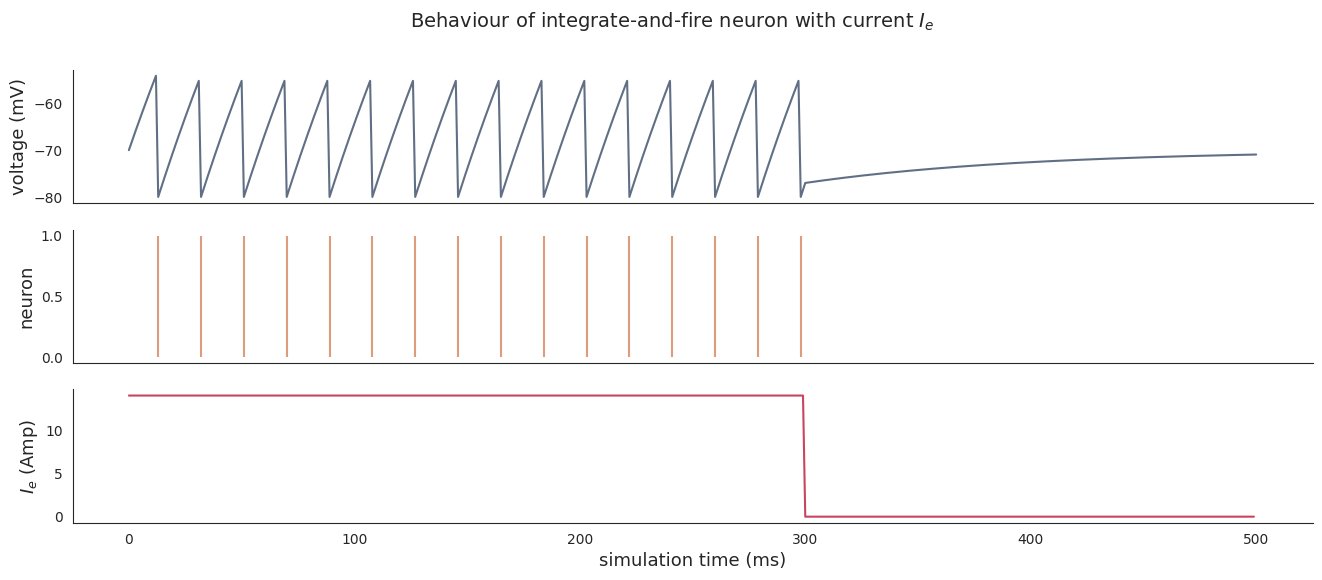

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,6), dpi=100, sharex=True)
fig.suptitle(r'Behaviour of integrate-and-fire neuron with current $I_e$', fontsize=14)
ax1.plot(v)
ax1.set_ylabel('voltage (mV)', fontsize=13)

ax2.vlines(spiketimes, 0, 1, colors=color_scheme[3])
ax2.set_xticks([0, 100, 200, 300, 400, 500])
ax2.set_ylabel('neuron', fontsize=13)

ax3.plot(I_range, c=color_scheme[4])
ax3.set_xlabel('simulation time (ms)', fontsize=13)
ax3.set_ylabel(r'$I_e$ (Amp)', fontsize=13)
sns.despine(left=False, bottom=False);

In [59]:
'''
Test firing rate for range of input currents Ie
'''
Iarr = np.arange(0, 50, 1)
total_spikes = []

for c in Iarr:
  v, spiketrain, spiketimes, I_range = integrate_and_fire(I_e=c)
  total_spikes.append(sum(spiketrain)*2) # count all spikes that occured in simulation * 2 (1000 ms)

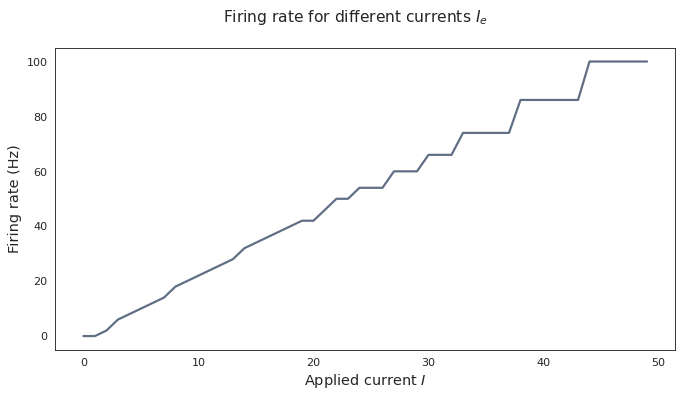

In [64]:
fig, ax = plt.subplots(1, figsize=(10,5), dpi=80)
fig.suptitle(r'Firing rate for different currents $I_e$', fontsize=14)
ax.plot(Iarr, total_spikes, lw=2)
ax.set_xlabel(r'Applied current $I$', fontsize=13)
ax.set_ylabel('Firing rate (Hz)', fontsize=13);

# Take Home exercises: Drift Diffusion

Many events in nature are set off when a stochastic process first reaches a threshold. The first passage time (FPT), also referred to as first-hitting time, is the time required for a stochastic process to reach this threshold from an initial state.

Here, we apply the first passage time distribution to model the linear and threshold behaviour of a single neuron. We have the following steps:

1. Let the membrane potential v be the state of a neuron
2. Initialise v at its resting potential (e.g. v=0)
3. Assume that EPSPs increase v by one and IPSPs decrease v by one. The presynaptic events are taken to be random and indepenent:
\begin{align}
  v_{t+1} = v_t + \xi
\end{align}
where $\xi ± 1$ is a random variable with mean $\mu$ and variance $\sigma^2$.
4. Choose a threshold $v_{th}$. Whenever $v$ reaches the threshold, a spike is emitted and $v$ is reset to 0.

We generate first passage times (FPT) from the drift distribution model. Check whether the distribution of these times coincide with the FPT distribution $\rho$ that was given in the lecture.

The continuous time diffusion process can be simulated as 
\begin{align}
  v(t+dt) = v(t) + \mu dt + d \xi
\end{align}
where $\mu$ is the mean drift and $d \xi$ is a Gaussian random variable with mean zero and standard deviation $\sigma\sqrt{dt}$. The FPT is the smallest $t$ that $v(t) > v_{th}$.

## 1. Generate diffusion trajectories

---

> Generate $n$ diffusion trajectories $v_i(t) \text{ for } i = 1, \dots , n$ with $0 < t < T$ and $n$ as large as you can. 
Use $dt = 0.001, \mu = 0.1, \sigma = 0.1, v_{th} = 1$ and total time $T = 20$. 

---

In [12]:
'''
Parameterise
'''
n = 10000 # number of trajectories
dt = 0.001 # time step
mu = 0.1 # mean drift
sig = 0.1 # standard deviation 
v_th = 1 # threshold
T = 25 # total time

t = np.linspace(0, T, int(T/dt)) # time 
v = np.zeros((n, int(T/dt))) 
v.shape # trajectory x timesteps

(10000, 25000)

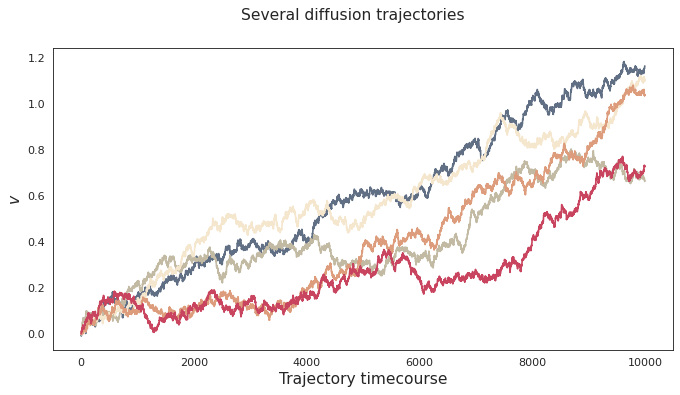

In [13]:
'''
Generate n diffusion trajectories
'''
for k in range(n-1):
  dxi = np.random.normal(loc=0, scale=sig*np.sqrt(dt), size=int(T/dt))
  v[k+1, :] = v[k, :] + mu * dt + dxi

'''
Plot some diffusion trajectories
'''
fig, ax = plt.subplots(1, figsize=(10,5), dpi=80)
fig.suptitle('Several diffusion trajectories', fontsize=14)
ax.set_xlabel('Trajectory timecourse', fontsize=14)
ax.set_ylabel(r'$v$', fontsize=14)
indices = [20, 40, 60, 200, 500]
for i in indices: ax.plot(v[:, i])

## 2. Estimate the FPT for each trial $t_i$

---

> Generate a histogram of FPTs. Hint: For a given final time T it may be that some trajectories have not reached the threshold. This can be solved by increasing T . Alternatively, if they are only very few trials that have not reached the threshold, you can set their FPTs as t = T.

---

In [14]:
# print(np.where(v[5000, :] > v_th)[0][0])
# np.argmax(v[5000, :] > v_th) 

In [15]:
FP_times = []

for t in range(n): # iterate through all n trajectories
  # find index of first crossing, take the first index
  FPidx = np.argmax(v[:, t] > v_th) * dt
  if FPidx == 0: # set FPT to T is threshold is not reached
    FPidx = T 
  FP_times.append(FPidx)

## 3. Compare theoretical and estimations

---

> Generate a plot that compares the estimated distribution of first passage times (ie. a histogram with properly chosen bin size ∆t) with the theoretical prediction FPT distribution $\rho$(t) ∆t.

---

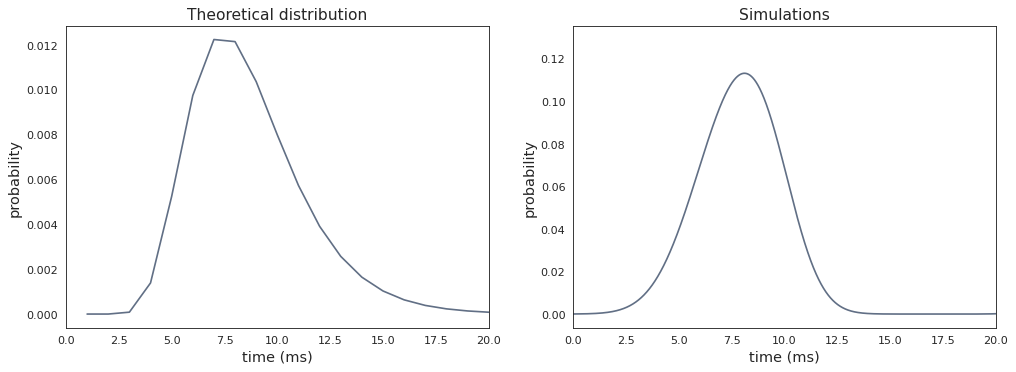

In [21]:
'''
Define theoretical distribution & make density from histogram
'''
rho = lambda t: v_th /(np.sqrt(2 * np.pi) * sig * t**3/2) * np.exp(-((v_th - mu*t)**2) / (2*(sig**2)*t))
P_t = kde.gaussian_kde(FP_times) # density
t = np.linspace(0, T+dt, int(T/dt)) # time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), dpi=80)
ax1.set_title('Theoretical distribution', fontsize=14)
ax1.plot(rho(np.arange(0, T)))
ax1.set_xlabel('time (ms)', fontsize=13)
ax1.set_ylabel('probability', fontsize=13)
ax1.set_xlim([0, 20])

ax2.set_title('Simulations', fontsize=14)
ax2.plot(t, P_t(t))
ax2.set_xlabel('time (ms)', fontsize=13)
ax2.set_ylabel('probability', fontsize=13);
ax2.set_xlim([0, 20]);

![](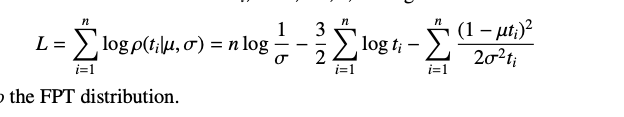)

## 4. Maximum likelihood


---

> Show that the maximum likelihood estimates are given by
\begin{align}
& \mu = \frac{1}{\bar{t}}
& \sigma^2 = f - \frac{1}{\bar{t}}
\end{align}
with 
\begin{align}
\bar{t} = \frac{1}{n} \sum_{i = 1}^{n} t_i \qquad \text{ and } \qquad 
f = \frac{1}{n} \sum_{i = 1}^{n} \frac{1}{t_i}
\end{align}
The log likelihood for observed FPTs $t_i, i = 1, \dots, n$ is
\begin{align}
  L &= \sum_{i=1}^n \log \rho(t_i | \mu, \sigma) \\
    &= n \log \frac{1}{\sigma} - \frac{3}{2} \sum_{i=1}^n \log t_i - \sum_{i=1}^n \frac{(1-\mu t_i)^2}{2 \sigma^2 t_i}
\end{align}

---

To find the maximum likelihood estimates we differentiate the Log likelihood with respect to $\mu$ and $\sigma$, then set them equal to zero.

For $\mu$ we get



\begin{align}
\frac{\partial L}{\partial \mu} &= 0 - \sum_{i=1}^n \frac{1}{2 \sigma^2 t_i} 2 (1 - \mu t_i) \cdot - t_i \\
      &= \sum_{i=1}^n \frac{2(1 - \mu t_i) \cdot t_i}{2 \sigma^2 t_i} \\
      &= \sum_{i=1}^n \frac{(1 - \mu t_i)}{\sigma^2} \\
      &= \sum_{i=1}^n t_i \frac{(1 - \mu)}{\sigma^2} \\
      &= \frac{(1 - \mu)}{\sigma^2} \sum_{i=1}^n t_i 
\end{align}


For $\sigma$ we get

\begin{align}
  \frac{\partial L}{\partial \sigma} &= \left(n \log \frac{1}{\sigma}\right)' - 0 - \left(\sum_{i=1}^n (1- \mu t_i)^2 \cdot \frac{1}{2 \sigma^2 t_i}   \right)
\end{align}

\begin{align}
  \left(n \log \frac{1}{\sigma}\right)' &= - \frac{n}{\sigma}
\end{align}

\begin{align}
\sum_{i=1}^n (1 - \mu t_i)^2 \cdot \frac{1}{2 \sigma^2 t_i} &= \sum_{i=1}^n (1 - \mu t_i) \cdot - \frac{1}{(2 \sigma^2 t_i)^2} \cdot 4 \sigma t_i \\
&= \sum_{i=1}^n (1 - \mu t_i)^2 \cdot \frac{1}{\sigma^3 t_i} \\
&= \sum_{i=1}^n \frac{1 - 2 \mu t_i + \mu_2 t_i^2}{\sigma^3 t_i} 
\end{align}


## 5. Generate data with μ and σ

---

> Generate different datasets and compare the empirical estimates of μ and σ with the model values for distinct values for μ and σ.

---

In [17]:
# get range of values of mu and sigma
mu_range = np.arange(0.1, 1, 0.1) 
sig_range = np.arange(0.1, 1, 0.1)

emp_mu = np.zeros(len(mu_range))
emp_sig = np.zeros(len(sig_range))

for mu in mu_range:
  for sig in sig_range:
    # generate trajectories with mu and sigma

        #
        emp_mu[k] = np.mean(FP_times)
        emp_sig[k] = np.std(FP_times)

IndexError: ignored

```
Student: Daphne Cornelisse (s1066862)
``` 